In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


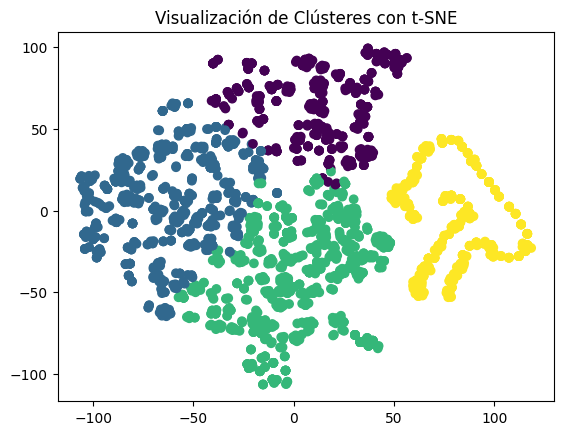

Coeficiente de Silueta: 0.23450790345668793


In [ ]:
import os
from glob import glob
import numpy as np
import joblib
from keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Directorio de imágenes
data_total = '/content/drive/MyDrive/all_images'

# Parámetros
epocas = 100
longitud, altura = 150, 150
clases = 4

# Obtener lista de rutas de todas las imágenes
lista_imagenes = glob(os.path.join(data_total, '*.png'))

# Cargar todas las imágenes y convertirlas a matrices numpy
X = [img_to_array(load_img(img_path, target_size=(altura, longitud))) for img_path in lista_imagenes]
X = np.array(X)

# Asegurarse de que las imágenes tengan la misma forma
X = X.reshape(-1, altura * longitud * 3)

# Normalización de datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar K-Means directamente a las características normalizadas
kmeans = KMeans(n_clusters=clases, random_state=42, n_init=epocas)
labels = kmeans.fit_predict(X_normalized)

# Guardar el modelo K-Means
joblib.dump(kmeans, '/content/modelo/kmeans_model_cnn_features.joblib')

# Visualización de los resultados con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title('Visualización de Clústeres con t-SNE')
plt.show()

# Coeficiente de silueta
silhouette_avg = silhouette_score(X_normalized, labels)
print(f'Coeficiente de Silueta: {silhouette_avg}')


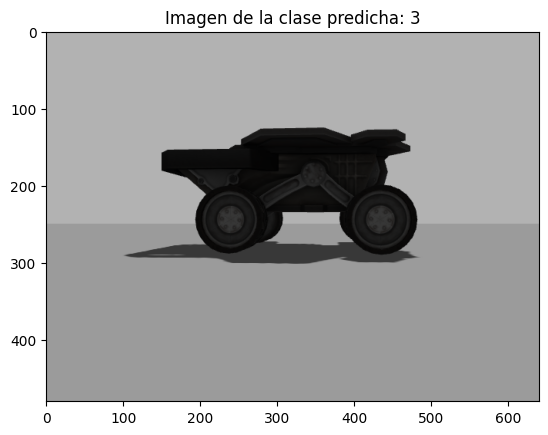

La nueva imagen pertenece al clúster: 3


In [ ]:
# Cargar el modelo K-Means previamente entrenado
modelo_kmeans = joblib.load('/content/modelo/kmeans_model_cnn_features.joblib')

# Cargar y preprocesar la nueva imagen que deseas predecir
nueva_imagen_path = '/content/drive/MyDrive/images_dataset/training/rover/image_3672.png'
nueva_imagen = img_to_array(load_img(nueva_imagen_path, target_size=(altura, longitud)))
nueva_imagen = nueva_imagen.reshape(1, -1)
nueva_imagen_normalized = scaler.transform(nueva_imagen)

# Predecir el clúster al que pertenece la nueva imagen
nuevo_label = modelo_kmeans.predict(nueva_imagen_normalized)

# Visualizar la nueva imagen
plt.imshow(load_img(nueva_imagen_path))
plt.title(f'Imagen de la clase predicha: {nuevo_label[0]}')
plt.show()

# Imprimir el resultado de la predicción
print(f'La nueva imagen pertenece al clúster: {nuevo_label[0]}')
